# Basic Neural Network

A simple feedforward neural network to classify spin configurations. Based off of course material from CSCI 1051 by Teal Witter.

In [1]:
# We start by importing the libraries we'll use today
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

Load the data generated by the ON_Model

In [2]:
# data transforms
dset_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()])


# Use the image folder function to create datasets
dsets = {x: datasets.ImageFolder(f"../data/binary_class/{x}", dset_transform)
         for x in ['train', 'test']}

# dataloaders = {x: torch.utils.data.DataLoader(dsets[x], batch_size=16,
#                                               shuffle=(x == "train"))
#                for x in ['train', 'test']}

trainingdata = dsets['train']
testdata = dsets['test']

#load a dataset to test for performance vs temperature
perfdata = datasets.ImageFolder(f"../data/temp_class/test", dset_transform)


trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)
perfDataLoader = torch.utils.data.DataLoader(perfdata,batch_size=64,shuffle=False)

In [3]:
print(len(trainingdata))

440


torch.Size([1, 25, 25])
1


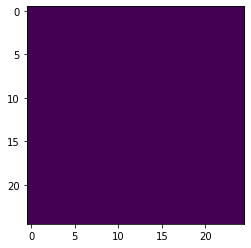

In [4]:
image, label = trainingdata[355]
print(image.shape)
print(label)
plt.imshow(image.squeeze().numpy())
plt.show()

This is a basic feedforward neural net architecture

In [5]:
class NeuralNet(torch.nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.layers = torch.nn.Sequential(
      torch.nn.Linear(25*25, 256),
      torch.nn.ReLU(),
      torch.nn.Linear(256, 128),
      torch.nn.ReLU(),
      torch.nn.Linear(128, 64),
      torch.nn.ReLU(),
      torch.nn.Linear(64, 2)
    )
  
  def forward(self, x):
    x = x.view(-1, 25*25) # change so 784 vector instead of 28x28 matrix
    return self.layers(x)



In [6]:
# define loss function, optimizer
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
save_loss = {'train':[], 'test':[]}
save_acc = {'train':[], 'test':[]}

Now let's train our model!

In [7]:
train_loss_history = []
test_loss_history = []

for epoch in range(30):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    optimizer.zero_grad()
    predicted_output = model(images)
    fit = criterion(predicted_output, labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item() / len(trainingdata)
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      predicted_output = model(images)
      fit = criterion(predicted_output, labels)
      test_loss += fit.item() / len(testdata)
  train_loss_history += [train_loss]
  test_loss_history += [test_loss]
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')
    

Epoch 0, Train loss 0.010677360540086573, Test loss 0.010545851553187649
Epoch 1, Train loss 0.010636912286281585, Test loss 0.01049656493991029
Epoch 2, Train loss 0.010572545501318845, Test loss 0.010439820616853003
Epoch 3, Train loss 0.010509402914480728, Test loss 0.010382949370963901
Epoch 4, Train loss 0.010447008230469445, Test loss 0.01032761440557592
Epoch 5, Train loss 0.010415672578594902, Test loss 0.010273964264813591
Epoch 6, Train loss 0.010345231132073836, Test loss 0.010226692989760755
Epoch 7, Train loss 0.010290062427520754, Test loss 0.010182236105787989
Epoch 8, Train loss 0.010242018103599548, Test loss 0.010139154803519155
Epoch 9, Train loss 0.010195097598162563, Test loss 0.010098141314936618
Epoch 10, Train loss 0.01016416238112883, Test loss 0.01005855027367087
Epoch 11, Train loss 0.01010992093519731, Test loss 0.01002412970159568
Epoch 12, Train loss 0.010073898055336691, Test loss 0.009992301405644884
Epoch 13, Train loss 0.010051875900138507, Test loss 0

Let's plot our loss by epoch to see how we did.

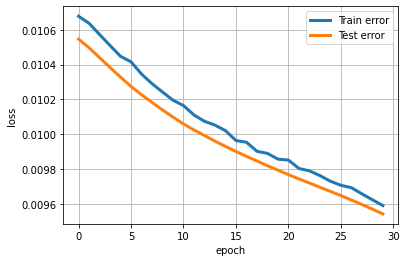

In [8]:
plt.plot(range(30),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(30),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_2150766/2300132830.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()


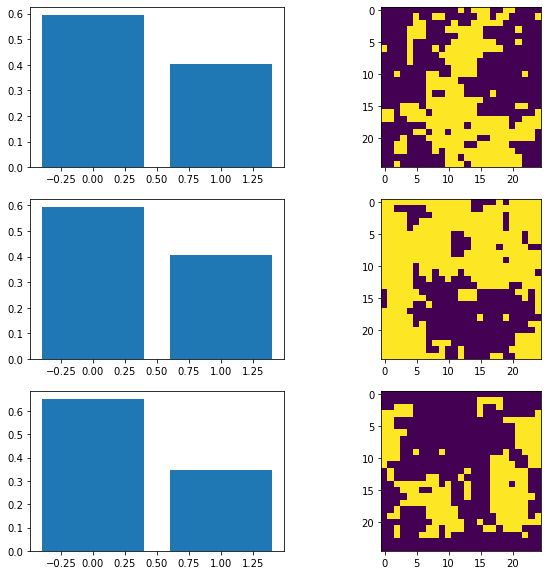

In [16]:
plt.figure(figsize=(10,10))
for index in [0,1,2]:
  
  image, label = trainingdata[index]
  # print(image)
  predicted_output = model(images)[index]
  # Need to apply softmax to get probabilities
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()

  plt.subplot(3,2,2*(index)+1)
  plt.bar(list(range(len(prob_output))), prob_output)
 
  plt.subplot(3,2,2*(index)+2)
  plt.imshow(image.squeeze().numpy())
  
plt.show()

Now lets use the dataset that we classified by temperature to plot confidence vs temperature

/tmp/ipykernel_2150766/3453316495.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()


[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.6535369  0.34646305]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.6535369  0.34646305]]
[[0.6535369  0.34646305]]
[[0.6535369  0.34646305]]
[[0.6535369  0.34646305]]
[[0.6535369  0.34646305]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5952526  0.40474734]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.59791    0.40209004]]
[[0.5953637  0.40463632]]
[[0.5953637  0.40463632]]
[[0.5953637 

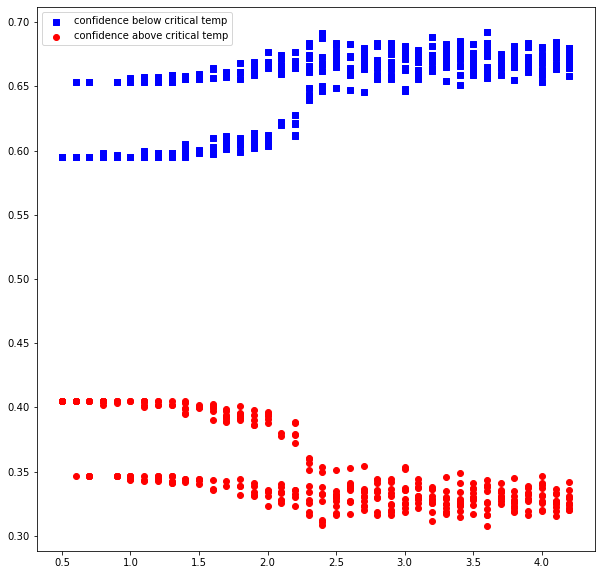

In [10]:
temp_pred_below = []
temp_pred_above = []
for idx in range(len(perfdata)):
  image, label = perfdata[idx]
  predicted_output = model(image.unsqueeze(0))
  
  # Need to apply softmax to get probabilities
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()
  print(prob_output)
  #get temp from label
  temp = perfdata.classes[label]
  temp_pred_below.append([float(temp), prob_output[0][0]])
  temp_pred_above.append([float(temp), prob_output[0][1]])

#plot the data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter([x[0] for x in temp_pred_below], [x[1] for x in temp_pred_below], c='b', marker="s", label='confidence below critical temp')
ax.scatter([x[0] for x in temp_pred_above], [x[1] for x in temp_pred_above], c='r', marker="o", label='confidence above critical temp')

plt.legend(loc='upper left');
plt.show()




/tmp/ipykernel_2150766/1255016455.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()


[[0.6773725  0.32262757]]
[[0.6766621  0.32333785]]
[[0.6749213 0.3250787]]
[[0.6742448 0.3257552]]
[[0.6398361  0.36016396]]
[[0.6661946  0.33380538]]
[[0.6709513 0.3290487]]
[[0.6688903 0.3311097]]
[[0.67492193 0.3250781 ]]
[[0.6767516  0.32324848]]
[[0.66296303 0.3370369 ]]
[[0.668121   0.33187893]]
[[0.6790052  0.32099476]]
[[0.67065054 0.32934955]]
[[0.65951496 0.34048507]]
[[0.65232456 0.3476754 ]]
[[0.6341029  0.36589715]]
[[0.6686283  0.33137178]]
[[0.68056494 0.31943506]]
[[0.64629453 0.35370556]]
[[0.6755162  0.32448378]]
[[0.6686426 0.3313574]]
[[0.6726292  0.32737082]]
[[0.6634295 0.3365705]]
[[0.6792582 0.3207418]]
[[0.64578784 0.35421214]]
[[0.6871158 0.3128842]]
[[0.6345837  0.36541623]]
[[0.6489746  0.35102537]]
[[0.672815   0.32718492]]
[[0.6439776  0.35602245]]
[[0.681101   0.31889892]]
[[0.6726614  0.32733858]]
[[0.6286579  0.37134215]]
[[0.6814584 0.3185416]]
[[0.67358726 0.32641268]]
[[0.659144 0.340856]]
[[0.66303    0.33697003]]
[[0.6783562 0.3216438]]
[[0.686663

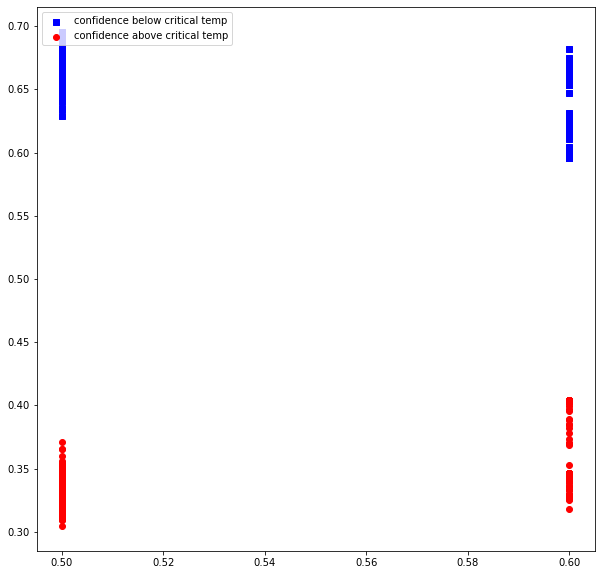

In [11]:
temp_pred_below = []
temp_pred_above = []
for idx in range(len(perfdata)):
  image, label = trainingdata[idx]
  predicted_output = model(image.unsqueeze(0))
  
  # Need to apply softmax to get probabilities
  prob_output = torch.nn.functional.softmax(predicted_output).detach().numpy()
  # print(prob_output)
  #get temp from label
  temp = perfdata.classes[label]

  temp_pred_below.append([float(temp), prob_output[0][0]])
  temp_pred_above.append([float(temp), prob_output[0][1]])

#plot the data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter([x[0] for x in temp_pred_below], [x[1] for x in temp_pred_below], c='b', marker="s", label='confidence below critical temp')
ax.scatter([x[0] for x in temp_pred_above], [x[1] for x in temp_pred_above], c='r', marker="o", label='confidence above critical temp')

plt.legend(loc='upper left');
plt.show()